In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

import seaborn as sns

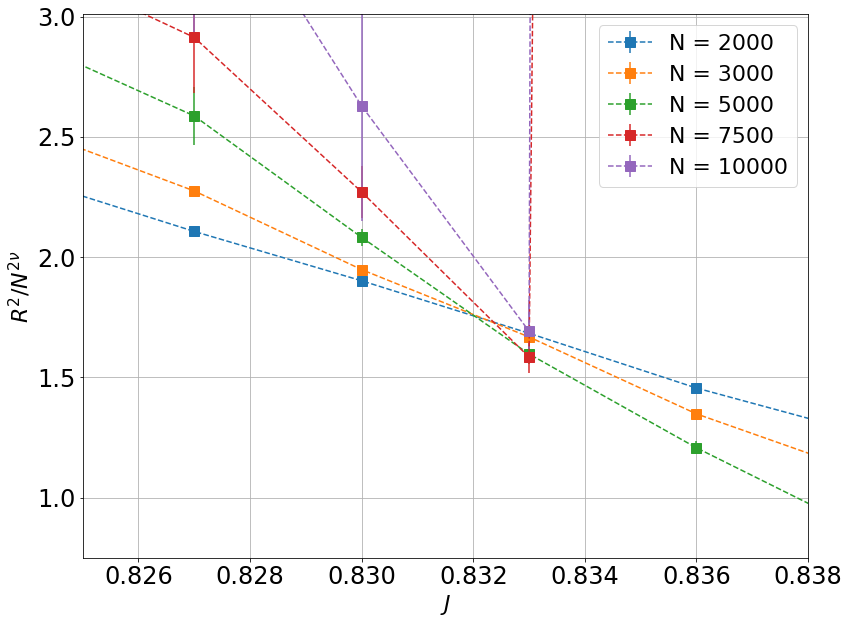

In [2]:
data_np = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=1)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7
for l in lengths:
    
    #if (l>5000):
    #    continue
 
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
  
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
#add N = 8000
data_np = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
#data_np = np.loadtxt("Ising/ClusterUpdate/longnear2.txt")
l=6000
data_l = data_np[data_np[:,0]==l]   
r_l = data_l[:, 3]
rl_scale = r_l/np.power(l, 2*nu)
err = data_l[:, 4]/np.power(l, 2*nu)
#plt.errorbar(data_l[:,1], rl_scale, yerr=err, fmt="s--", ms = 10, label = "N = " + str(l))
     
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 

plt.ylim(0.75, 3.01)
plt.xlim(0.825, 0.838)

plt.legend(fontsize=22)

#plt.grid()
plt.grid()

[5000, 1000]
[5000, 2000]
[5000, 3000]
[5000, 7000]
[5000, 7500]
[5000, 8000]
[5000, 9000]


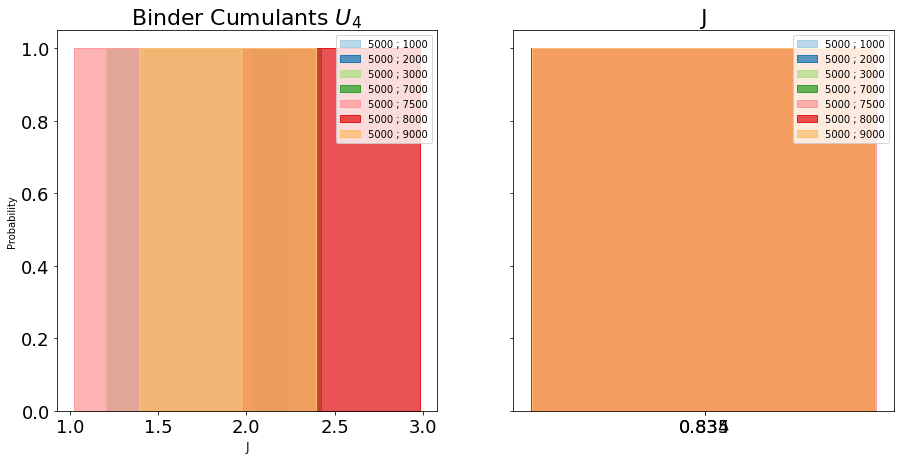

In [19]:
data_np = np.loadtxt("Ising/Main2/longnear.txt", skiprows=0)

data_np1 = np.loadtxt("Ising/Main/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Main1/longnear.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("Ising/Canonical_near_phase/longnear1.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))


data_np1 = np.loadtxt("Ising/Canonical_near_phase/all_no_gyration_radius.txt", skiprows=1)
data_np = np.vstack((data_np, data_np1))

J_min = 0.826
J_max = 0.841
data_np = data_np[data_np[:,1]<=J_max]
data_np = data_np[data_np[:,1]>=J_min]

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

pairs = [[5000, 2000], [5000, 3000], [5000, 6000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000], [5000, 10000]]

#no 5000-6000
pairs = [[5000, 1000], [5000, 2000], [5000, 3000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000], [5000, 10000]]


pairs = [[5000, 1000], [5000, 2000], [5000, 3000], [5000, 7000], [5000, 7500], [5000,8000], [5000, 9000] ]
#pairs = [[5000, 1000], [5000, 2000], [1000,2000]]

fig, axs = plt.subplots(1,  2, figsize=(15, 7), sharey=True)
axs[0].set_title("Binder Cumulants " + r"$U_4$", fontsize=22)
axs[1].set_title("J",fontsize=22)
c = 0 
#custom_palette =sns.color_palette("RdPu",  len(pairs)) #sns.color_palette("Paired", len(pairs))
#sns.set_palette("Paired")
custom_palette = sns.color_palette("Paired", len(pairs))

L_plot = []
BC_plot = []
err_plot = []
J_plot = []
J_err_plot = []

nu = 4/7 
for pair in pairs:
    
    print(pair)
    data_l1 = data_np[data_np[:,0]==pair[0]]
    data_l2 = data_np[data_np[:,0]==pair[1]]
 
    
    bc_1 = []
    errs_1=[]
    bc_2 = []
    errs_2 = []    
    
    crit_J = []
    crit_bc = []
    for step in range(1000):
        bc_1 = []
        errs_1=[]
        bc_2 = []
        errs_2 = [] 
        J_l1 =  np.unique(data_l1[:, 1])
        for J in J_l1 :

            data_l = data_l1[data_l1[:,1]==J]
            ind = np.argmin(data_l[:, 4])
            data_l = data_l[ind, :]
            #m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            #m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            #cum_1 = 1 - m4/3/m2/m2
            cum_1 = data_l[3]/np.power(pair[0], 2*nu)
            bc_1.append(cum_1)
            errs_1.append(data_l[4]/np.power(pair[0], 2*nu))

        J_l2 =  np.unique(data_l2[:, 1])
        for J in J_l2 :
            data_l = data_l2[data_l2[:,1]==J]
            ind = np.argmin(data_l[:, 4])
            data_l = data_l[ind, :]
            #m2 = norm.rvs(data_l[15], data_l[16], size =  1000 )
            #m4 = norm.rvs(data_l[17], data_l[18], size =  1000 )
            #cum_2 = 1 - m4/3/m2/m2
            cum_2 = data_l[3]/np.power(pair[1], 2*nu)
            bc_2.append(cum_2)
            errs_2.append(data_l[4]/np.power(pair[1], 2*nu))
            
        #print(J_l1, bc_1)
        cov1 = np.zeros((len(bc_1), len(bc_1)))
        np.fill_diagonal(cov1, np.square(errs_1))
        cov2 = np.zeros((len(bc_2), len(bc_2)))
        np.fill_diagonal(cov2, np.square(errs_2))
        
        A1 = np.vstack([J_l1, np.ones(len(J_l1))]).T
        m1, c1 = np.linalg.lstsq(A1, bc_1, rcond=None)[0]
        
        #print(cov1.shape, A1.shape)
        CovMatrix = cov1
        X = A1
        CovMatrix_inv = np.linalg.inv(CovMatrix)
        X_transose = X.transpose()
        X_t_Cov = X_transose.dot(CovMatrix_inv) #np.matmul(X_transose, CovMatrix)
        First_part = X_t_Cov.dot(X) 
        First_part_inv =  np.linalg.inv(First_part  )
        FP_X_t = First_part_inv.dot(X_transose)
        y = bc_1
        Result = np.matmul( FP_X_t.dot(CovMatrix_inv), y )
        #print(Result, m1, c1)
        m1, c1 = Result
        
        
        A2 = np.vstack([J_l2, np.ones(len(J_l2))]).T
        m2, c2 = np.linalg.lstsq(A2, bc_2, rcond=None)[0]
        
        CovMatrix = cov2
        X = A2
        CovMatrix_inv = np.linalg.inv(CovMatrix)
        X_transose = X.transpose()
        X_t_Cov = X_transose.dot(CovMatrix_inv) #np.matmul(X_transose, CovMatrix)
        First_part = X_t_Cov.dot(X) 
        First_part_inv =  np.linalg.inv(First_part  )
        FP_X_t = First_part_inv.dot(X_transose)
        y = bc_2
        Result = np.matmul( FP_X_t.dot(CovMatrix_inv), y )
        #print(Result, m1, c1)
        m2, c2 = Result        
        
        
        A = np.array([[1, -m1], [1, -m2]])
        b = np.array([c1, c2])
        
        xy = np.dot(np.linalg.inv(A),b)
        
        crit_bc.append(xy[0])
        crit_J.append(xy[1])
     
    #axs[0].scatter(crit_J,crit_bc, label = str(pair[0])+ " ; " +str(pair[1]))
    L_plot.append(pair[1])
    BC_plot.append(np.mean(crit_bc))
    err_plot.append(np.std(crit_bc))
    J_plot.append(np.mean(crit_J))
    J_err_plot.append(np.std(crit_J))
    
    #print(crit_bc)
    sns.histplot(data=crit_bc,label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[0], color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    #axs[0].hist(crit_bc, alpha =0.54, label = str(pair[0])+ " ; " +str(pair[1]),bins = "auto", histtype = 'barstacked',stacked=True  ) #density=True 
    #sns.kdeplot(data=crit_bc, label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[0] )
    #axs[1].hist(crit_J, alpha =0.84, label = str(pair[0])+ " ; " +str(pair[1]),bins = "auto", histtype = 'step',linewidth=2,stacked=True   ) #density=True 
    #sns.kdeplot(data=crit_J, label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[1] )
    sns.histplot(data=crit_J,label = str(pair[0])+ " ; " +str(pair[1]), ax=axs[1], color=custom_palette[c],stat="probability",multiple="stack",element="step" )
    c+=1
    #axs[0].set_xlim()


axs[1].set_xticks([ 0.834, 0.835]) 
axs[1].set_xticklabels([0.834, 0.835], fontsize=12)
axs[0].legend()
axs[1].legend() 
axs[0].tick_params(axis='x', labelsize=18) 
axs[0].tick_params(axis='y', labelsize=18) 
axs[1].tick_params(axis='x', labelsize=18) 
axs[1].tick_params(axis='y', labelsize=18)
axs[0].set_xlabel("R", fontsize=12)
axs[0].set_xlabel("J", fontsize=12)
plt.savefig("/home/kamilla/Lattice_models/img/radius_hist_cov.png")

Text(0, 0.5, '$J_{\\theta}$')

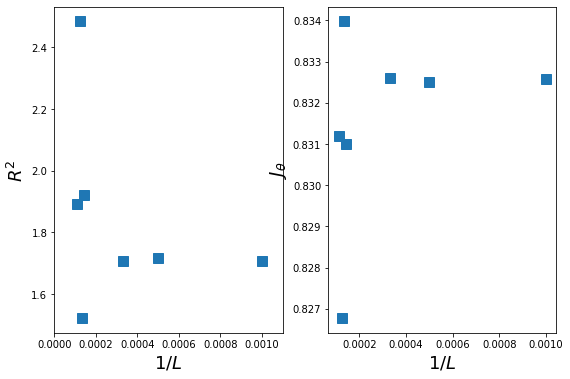

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(9,6)) #,  sharey='row')
axes = axes.reshape(-1)
 

axes[0].errorbar(1/np.array(L_plot), BC_plot, yerr=err_plot, fmt="s", ms = 10 )
axes[0].set_xlabel(r"$1/L$", fontsize = 18)
axes[0].set_ylabel(r"$R^2$", fontsize = 18)
axes[0].set_xlim([0,0.0011])

axes[1].errorbar(1/np.array(L_plot), J_plot, yerr=J_err_plot, fmt="s", ms = 10 )
axes[1].set_xlabel(r"$1/L$", fontsize = 18)
axes[1].set_ylabel(r"$J_{\theta}$", fontsize = 18)

In [21]:
A2 = np.vstack([1/np.array(L_plot), np.ones(len(1/np.array(L_plot)))]).T
m2, c2 = np.linalg.lstsq(A2, BC_plot, rcond=None)[0]

m1, c1 = m2, c2

A2 = np.vstack([1/np.array(L_plot), np.ones(len(1/np.array(L_plot)))]).T
m2, c2 = np.linalg.lstsq(A2, J_plot, rcond=None)[0]

m2, c2

(2.4030647386164325, 0.8307156848650797)

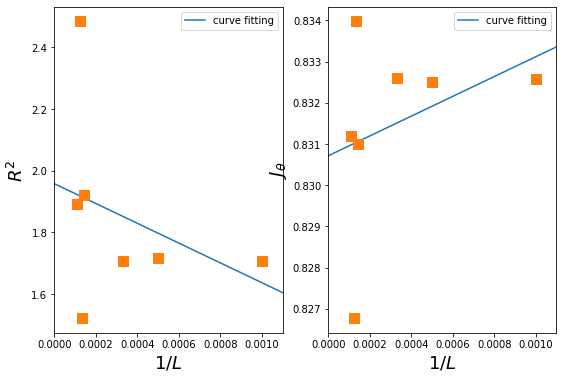

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(9,6)) #,  sharey='row')
axes = axes.reshape(-1)

xfit = np.array([0,0.0011])
jfit = c2+m2*xfit
axes[1].plot(xfit,jfit, label = "curve fitting")

xfit = np.array([0,0.0011])
jfit = c1+m1*xfit
axes[0].plot(xfit,jfit, label = "curve fitting")

axes[0].errorbar(1/np.array(L_plot), BC_plot, yerr=err_plot, fmt="s", ms = 10 )
axes[0].set_xlabel(r"$1/L$", fontsize = 18)
axes[0].set_ylabel(r"$R^2$", fontsize = 18)
axes[0].set_xlim([0,0.0011])

axes[1].errorbar(1/np.array(L_plot), J_plot, yerr=J_err_plot, fmt="s", ms = 10 )
axes[1].set_xlabel(r"$1/L$", fontsize = 18)
axes[1].set_ylabel(r"$J_{\theta}$", fontsize = 18)
axes[1].set_xlim([0,0.0011])

axes[0].legend()
axes[1].legend()
plt.savefig("/home/kamilla/Lattice_models/img/criticalr2.png") 